In [33]:
"""Hypothesis: Prices of housing went up post-covid"""


import geopy as gp
from geopy import distance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fn='/Users/mlid/Downloads/londonCoors.xlsx'

In [3]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [4]:
df = pd.read_excel(fn)

In [5]:
print(df.head())

      Borough         Co-ordinates  Number
0  Hillingdon  51.5441°N, 0.4760°W      33
1      Harrow   51.5898°N 0.3346°W      32
2      Barnet   51.6252°N 0.1517°W      31
3     Enfield   51.6538°N 0.0799°W      30
4    Haringey   51.6000°N 0.1119°W      29


In [6]:
df=df.set_index('Number')

In [7]:
df=df.sort_index(ascending=True)

In [8]:
df

,Borough,Co-ordinates
Number,,
1,City of London,51.5155°N 0.0922°W
2,Westminster,51.4973°N 0.1372°W
3,Kensington & Chelsea,51.5020°N 0.1947°W
4,Hammersmith & Fulham,51.4927°N 0.2339°W
5,Wandsworth,51.4567°N 0.1910°W
6,Lambeth,51.4607°N 0.1163°W
7,Southwark,51.5035°N 0.0804°W
8,Tower Hamlets,51.5099°N 0.0059°W
9,Hackney,51.5450°N 0.0553°W


In [9]:
london=df.iloc[0,1]

In [10]:
df['points']=df['Co-ordinates'].apply(lambda p: gp.Point(p))

In [11]:
df['distFromLon (km)']=df['points'].apply(lambda p: gp.distance.geodesic(p,london).km)

In [12]:
dT=properties.T
dT=dT.rename(index={'Unnamed: 0': 'London_Borough'})
dTlocs=dT.index
dTcols=list(dT.columns.values)
dT.index=(dT[0])
dT[0]=dTlocs
dT.dropna()
relevantBs=dT[1:33]

In [13]:
relevantBs=relevantBs.set_index(0)

In [14]:
t2=df.merge(relevantBs,left_on='Borough',right_on=0,how='inner')

In [15]:
# t2

In [16]:
colDf=lambda i : relevantBs[i]-relevantBs[i-1]

In [29]:
##Calculates MoM average price.

tmpDf=[]
tmpDfperc=[]
for i in range(2,relevantBs.shape[1]+1):
    tmpDf.append(colDf(i))
    tmpDfperc.append((colDf(i)/relevantBs[i])*100)

tmpDf=pd.concat(tmpDf,axis=1)
tmpDfperc=pd.concat(tmpDfperc,axis=1)

In [18]:
#Percentage of times a specific borough has seen negative MoM price changes

tmpDf.lt(0).sum(axis=1)*100/344

0
City of London          43.895349
Barking & Dagenham      30.523256
Barnet                  30.813953
Bexley                  29.360465
Brent                   34.302326
Bromley                 28.488372
Camden                  37.790698
Croydon                 29.069767
Ealing                  31.976744
Enfield                 30.232558
Greenwich               34.302326
Hackney                 37.209302
Hammersmith & Fulham    40.697674
Haringey                35.174419
Harrow                  30.232558
Havering                27.034884
Hillingdon              28.779070
Hounslow                35.174419
Islington               33.430233
Kensington & Chelsea    42.151163
Kingston upon Thames    32.848837
Lambeth                 36.046512
Lewisham                29.360465
Merton                  35.174419
Newham                  27.906977
Redbridge               30.523256
Richmond upon Thames    33.720930
Southwark               37.790698
Sutton                  31.104651
Tower Hamlet

In [19]:
#Number of boroughs less than the mean

# df['distFromLon (km)'].lt(df['distFromLon (km)'].mean()).sum()

In [20]:
# orderedDist.set_index('Borough')

In [21]:
rbs=relevantBs.reset_index()

In [22]:
rbs.head()


,0,1,2,3,4,5,6,7,8,9,...,337,338,339,340,341,342,343,344,345,346
0,City of London,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,962674,868654,931058,905101,960392,982370,960158,888278,875234,948692
1,Barking & Dagenham,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,352086,346059,344693,347710,348002,343972,340763,343731,344255,334460
2,Barnet,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,597762,603522,596521,585644,572257,570542,575808,586501,589399,597538
3,Bexley,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,402570,401263,395612,392642,385603,383969,387475,387360,389590,393227
4,Brent,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,73789.54287,...,551662,535332,527101,525558,523687,526985,525460,552411,554568,542864


In [23]:
rbDf=relevantBs.reset_index().join(df[['distFromLon (km)']])

In [24]:
rbDf=rbDf.fillna(0)

In [25]:
rbDf=rbDf.sort_values('distFromLon (km)')

In [26]:
closerBs=rbDf[0:16]
furtherBs=rbDf[16:]

In [30]:
tmpDf

,0,1,2,3,4,5,6,7,8,9,...,335,336,337,338,339,340,341,342,343,344
0,,,,,,,,,,,,,,,,,,,,,
City of London,-9246.21173,-3082.07058,-2019.49452,7307.94128,10491.36312,15227.52986,2201.3953,-7856.328,3565.0085,9597.4959,...,-12454,-94020,62404,-25957,55291,21978,-22212,-71880,-13044,73458
Barking & Dagenham,625.55323,183.18973,1864.5357,-91.25674,658.09979,-1587.22674,119.07711,-760.58515,42.14407,-665.07973,...,-2878,-6027,-1366,3017,292,-4030,-3209,2968,524,-9795
Barnet,-94.34869,-942.64528,-1484.64943,-504.87459,-150.76562,1334.01297,920.06744,911.80733,-705.73747,-1684.22373,...,3469,5760,-7001,-10877,-13387,-1715,5266,10693,2898,8139
Bexley,-170.16967,-420.42725,-89.82463,-280.53293,255.18747,-529.6228,709.8995,76.94762,20.38958,-683.90355,...,-6257,-1307,-5651,-2970,-7039,-1634,3506,-115,2230,3637
Brent,715.69499,-6.49923,949.8682,738.41649,606.43424,-183.44379,-579.99678,242.50177,-525.48902,-482.04857,...,-2173,-16330,-8231,-1543,-1871,3298,-1525,26951,2157,-11704
Bromley,-13.91748,-208.24801,-324.89916,418.20334,840.21874,515.68829,-844.15108,-613.94148,421.73079,695.61463,...,-3404,-4984,-6919,689,-3093,2284,3955,4147,661,7715
Camden,-1424.0259,773.3509,-184.3141,-168.6208,1958.1843,2140.1143,1502.2271,-4932.9528,-3138.3589,-2039.6526,...,1369,10869,-14850,15310,-16822,18355,-26746,12440,-27350,-9983
Croydon,-207.06683,-238.65201,-102.397,234.87049,207.59413,89.97009,-149.05567,400.07478,-458.88789,-54.866,...,2137,-3272,-8168,-9636,-3540,-3116,3661,6552,6225,-17889
Ealing,1011.17482,482.79737,809.0421,-111.84973,-446.39344,721.56079,354.43667,-695.57656,-1488.42217,-1250.31436,...,-782,-1323,-16136,-4549,-3034,3885,1271,4719,802,-16002


In [34]:
tmpDfperc

,0,1,2,3,4,5,6,7,8,9,...,335,336,337,338,339,340,341,342,343,344
0,,,,,,,,,,,,,,,,,,,,,
City of London,-11.248053,-3.895403,-2.619277,8.65776,11.055117,13.827114,1.959767,-7.519952,3.299769,8.158665,...,-1.293688,-10.823642,6.702483,-2.867857,5.757128,2.237243,-2.313369,-8.092061,-1.490344,7.743082
Barking & Dagenham,1.224515,0.357311,3.509152,-0.172045,1.225504,-3.045733,0.227976,-1.477679,0.081811,-1.307959,...,-0.817414,-1.741611,-0.396295,0.867677,0.083908,-1.171607,-0.94171,0.863466,0.152213,-2.928601
Barnet,-0.101243,-1.021865,-1.635745,-0.559368,-0.167318,1.458874,0.996161,0.977567,-0.762404,-1.853175,...,0.580331,0.954398,-1.173638,-1.857272,-2.339334,-0.300591,0.914541,1.823185,0.491687,1.362089
Bexley,-0.262656,-0.653167,-0.139745,-0.438352,0.397165,-0.831137,1.101771,0.119281,0.031597,-1.071176,...,-1.554264,-0.325722,-1.42842,-0.756414,-1.825453,-0.425555,0.904833,-0.029688,0.572397,0.924911
Brent,0.993714,-0.009025,1.301802,1.001867,0.816082,-0.247472,-0.788607,0.32864,-0.717254,-0.662318,...,-0.393901,-3.050443,-1.56156,-0.293593,-0.357274,0.625824,-0.290222,4.878795,0.388951,-2.155973
Bromley,-0.017044,-0.255678,-0.400495,0.512865,1.019895,0.622072,-1.02877,-0.753853,0.515172,0.842579,...,-0.669492,-0.989948,-1.393437,0.138567,-0.625939,0.460092,0.790404,0.821963,0.130843,1.504192
Camden,-1.191565,0.642947,-0.15347,-0.1406,1.606551,1.725515,1.19671,-4.090449,-2.671888,-1.767175,...,0.159312,1.249042,-1.736158,1.758462,-1.970193,2.104497,-3.163582,1.450096,-3.293102,-1.216636
Croydon,-0.30031,-0.34732,-0.149245,0.341159,0.300632,0.130123,-0.216043,0.576531,-0.665686,-0.079655,...,0.496176,-0.76552,-1.948222,-2.352436,-0.871754,-0.773274,0.900343,1.585769,1.484263,-4.45542
Ealing,1.249952,0.593264,0.984369,-0.136274,-0.546845,0.876189,0.428547,-0.848149,-1.848451,-1.577239,...,-0.14763,-0.250388,-3.150055,-0.896009,-0.601194,0.763941,0.249305,0.917135,0.155626,-3.204649


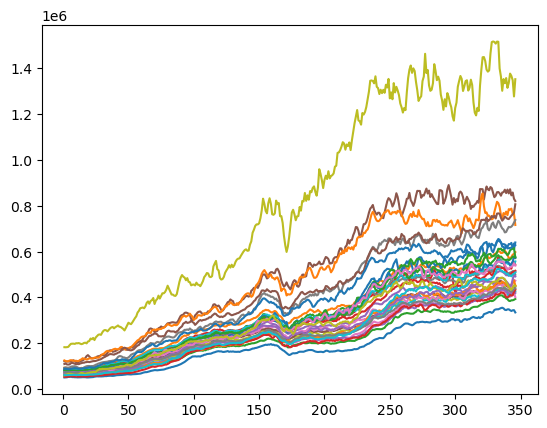

In [45]:
plt.plot(relevantBs[1:].T)

In [73]:
diffVec=relevantBs[345]-relevantBs[1]
diffVec=np.array([diffVec])
indx = np.argpartition(diffVec, -5)[-5:]
# diffVec.shape

print(indx)
# Return indices
res = diffVec[indx]

print(res)

[[ 1  3  7 15 28 10 24 16  9 29 17 22  5 14 25  8 30 20 27  4 23  2 21 13
  31 11 18 12 26  6  0 19]]


IndexError: index 1 is out of bounds for axis 0 with size 1